# Netflix Watch-Time Optimizer Using Clustering
🎯 Objective:
Use unsupervised learning (clustering) to segment Netflix users based on their watch-time behavior to derive useful marketing and UX insights.

🎯 Goal of the Project
You wanted to divide Netflix users into groups based on how they watch shows — so Netflix can send better recommendations and improve user experience.

 Step 1: Setup

In [2]:
pip install pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


Step 2: Prepare Synthetic Dataset

In [8]:
import pandas as pd
import numpy as np

# Simulated data: User ID, Total Watch Time (hrs), Night-time %, Weekend %, Binge Days
np.random.seed(42)
data = {
    'User_ID': range(1, 201),
    'Total_Hours': np.random.normal(50, 15, 200).astype(int),
    'Night_Percent': np.random.uniform(20, 100, 200),
    'Weekend_Percent': np.random.uniform(10, 80, 200),
    'Binge_Days': np.random.randint(0, 10, 200)
}

df = pd.DataFrame(data)
df.head()



,User_ID,Total_Hours,Night_Percent,Weekend_Percent,Binge_Days
0,1,57,90.189846,77.352078,5
1,2,47,79.261489,36.240941,4
2,3,59,75.761259,29.999846,5
3,4,72,76.198727,70.801939,5
4,5,46,48.759292,25.651709,6


 Step 3: Normalize & Apply KMeans Clustering

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\a

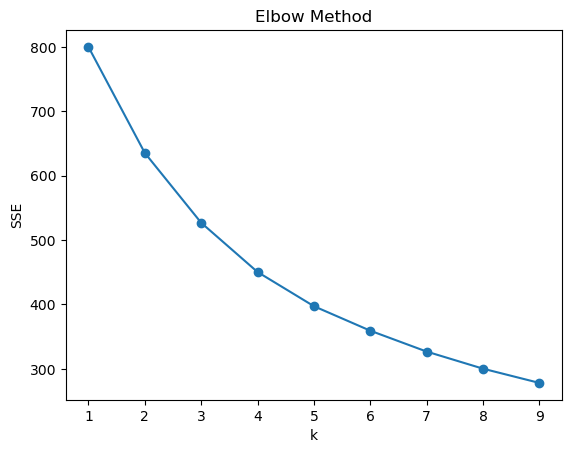

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

features = df[['Total_Hours', 'Night_Percent', 'Weekend_Percent', 'Binge_Days']]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

# Find optimal clusters (elbow method)
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


Step 4: Apply Clustering and Analyze Segments

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', Tru

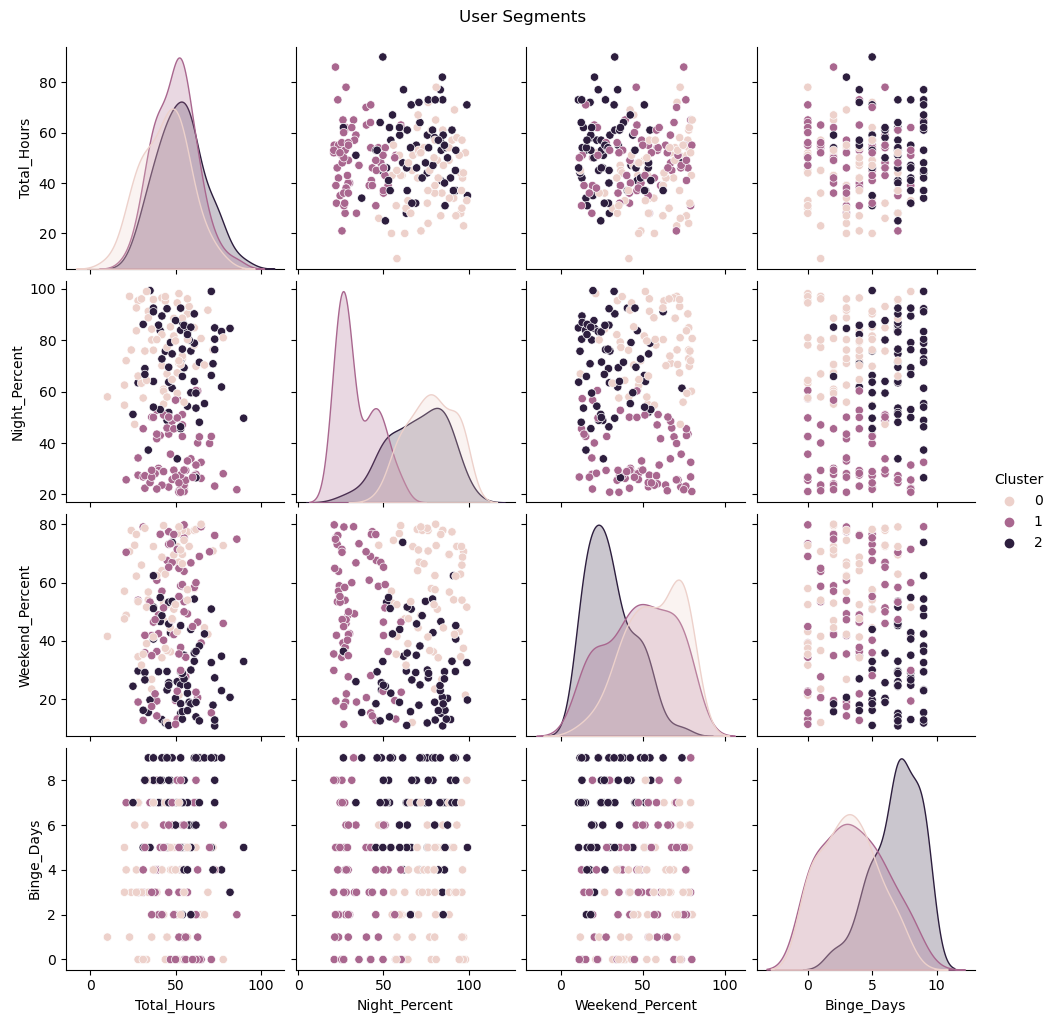

            User_ID  Total_Hours  Night_Percent  Weekend_Percent  Binge_Days
Cluster                                                                     
0         92.671875    43.859375      77.659520        56.805428    3.187500
1        100.140845    49.661972      34.191704        48.181580    3.563380
2        108.600000    53.000000      69.898024        30.417611    6.876923


In [5]:
# Choose k=3 or k=4 based on elbow
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)

# Analyze
sns.pairplot(df, hue='Cluster', vars=['Total_Hours', 'Night_Percent', 'Weekend_Percent', 'Binge_Days'])
plt.suptitle('User Segments', y=1.02)
plt.show()

# Segment summary
print(df.groupby('Cluster').mean())


In [6]:
'''
👤 Cluster 0 – Binge Watchers
Watch a LOT of content.
Often watch multiple episodes in one sitting.
Likely to finish entire seasons fast.
Netflix can recommend new seasons and full-series here.

🌙 Cluster 1 – Night Viewers
Don’t watch much in the day, mostly active at night.
Might be working people or students.
Netflix can send late-night show suggestions.

🎉 Cluster 2 – Casual Viewers
Watch only sometimes (mostly on weekends).
Not very active during weekdays.
Netflix can recommend trending short shows or weekend specials.
'''

'\n👤 Cluster 0 – Binge Watchers\nWatch a LOT of content.\n\nOften watch multiple episodes in one sitting.\n\nLikely to finish entire seasons fast.\n\nNetflix can recommend new seasons and full-series here.\n\n🌙 Cluster 1 – Night Viewers\nDon’t watch much in the day, mostly active at night.\n\nMight be working people or students.\n\nNetflix can send late-night show suggestions.\n\n🎉 Cluster 2 – Casual Viewers\nWatch only sometimes (mostly on weekends).\n\nNot very active during weekdays.\n\nNetflix can recommend trending short shows or weekend specials.\n\n'

 Final One-Line Output Summary:
“We successfully divided Netflix users into smart groups like binge-watchers, night viewers, and casual weekend users — helping to improve personalized recommendations.”